# 2 - ST News Headlines - EDA

In [19]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import warnings

pd.options.display.max_colwidth = 150
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [20]:
stopwords = set(stopwords.words('english'))
df = pd.read_csv("../data/st_sitemap_clean.csv")

In [22]:
df.sample(5)

Headline  \
428167           Panama Papers Law Firm Mossack Fonseca To Shut Down After Tax Scandal   
90085    Development Charge Rates Increased For Three Use Groups In Real Estate Market   
45214                                                      All Set To Savour The World   
324992  New Pentagon Chief Seeks To Underscore Alliances With Japan South Korea During   
131363  Japan Govt Spokesman Denies Pm Abe Donated Money To School At Heart Of Scandal   

                   Category  Wordcount  Charcount  
428167         World/Europe         12         69  
90085              Business         12         77  
45214             Lifestyle          6         27  
324992  World/United-states         12         78  
131363       Asia/East-asia         14         78

## Remove stopwords from headlines 

In [10]:
df['Headline_no_stopwords'] = df['Headline'].apply(
    lambda x: ' '.join([ item for item in x.lower().split(' ') if item not in stopwords ])
)
df['Wordcount_no_stopwords'] = df['Headline_no_stopwords'].apply(lambda x: len(x.split(' ')))
df['Charcount_no_stopwords'] = df['Headline_no_stopwords'].apply(lambda x: len(x))

In [25]:
# Get stopwords density
df['stopwords_density'] = (df['Wordcount'] - df['Wordcount_no_stopwords'])/df['Wordcount']
print("Stopwords Density: {:.2f}".format(df['stopwords_density'].mean()))

Stopwords Density: 0.22


## Plot top 50 news categories by article count

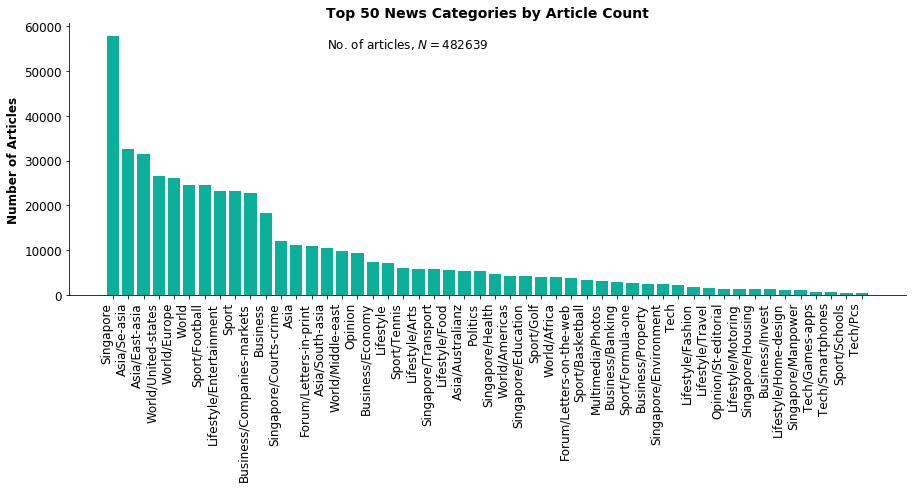

In [20]:
df_categories = df['Category'].value_counts()

fig, ax = plt.subplots(figsize=(15,5))
plt.title("Top 50 News Categories by Article Count",
          loc="center",
          fontsize=14,
          fontweight=600
         )
plt.ylabel("Number of Articles",
           fontsize=12,
           fontweight=600
          )
plt.xticks(rotation=90, ha='right', fontsize=12)
plt.yticks(fontsize=12)
ax.bar(df_categories[:50].index,
       df_categories[:50].values,
       color='#0cb09a'
      )
ax.text(14, 55000, f"No. of articles, $N={df.shape[0]}$", fontsize=12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.show()
plt.savefig('../static/img/top_50_categories.png',dpi=300, bbox_inches="tight")

## Histograms of word count and character count

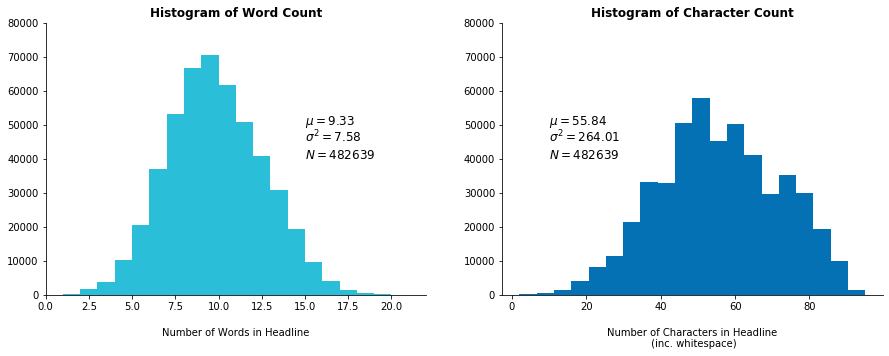

In [21]:
# Plot Histograms of wordcount and character count
# Including stopwords

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))

# Plot Wordcount
ax1.set_title(
    "Histogram of Word Count",
    fontsize=12,
    fontweight=600,
)
ax1.set_ylim(0,80000)
ax1.set_xlabel("\nNumber of Words in Headline")
ax1.hist(
    df['Wordcount'].values,
    color="#2bbed8",
    bins=20
)
ax1_mu = round(df['Wordcount'].mean(), 2)
ax1_var = round(df['Wordcount'].var(), 2)
ax1_N = df['Wordcount'].shape[0]
ax1.text(15, 50000, f'$\mu={ax1_mu}$', fontsize=12) # Mean
ax1.text(15, 45000, f'$\sigma^2={ax1_var}$', fontsize=12) # Variance
ax1.text(15, 40000, f'$N={ax1_N}$', fontsize=12) # Sample Size
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

# Plot Character Count
ax2.set_title(
    "Histogram of Character Count",
    fontsize=12,
    fontweight=600,
)
ax2.set_ylim(0,80000)
ax2.set_xlabel("\nNumber of Characters in Headline\n (inc. whitespace)")
ax2.hist(
    df['Charcount'].values,
    color='#0571b5',
    bins=20
)
ax2_mu = round(df['Charcount'].mean(), 2)
ax2_var = round(df['Charcount'].var(), 2)
ax2_N = df['Charcount'].shape[0]
ax2.text(10, 50000, f'$\mu={ax2_mu}$', fontsize=12) # Mean
ax2.text(10, 45000, f'$\sigma^2={ax2_var}$', fontsize=12) # Variance
ax2.text(10, 40000, f'$N={ax2_N}$', fontsize=12) # Sample Size

ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

fig.show()
plt.savefig('../static/img/histograms.png',dpi=300, bbox_inches="tight")

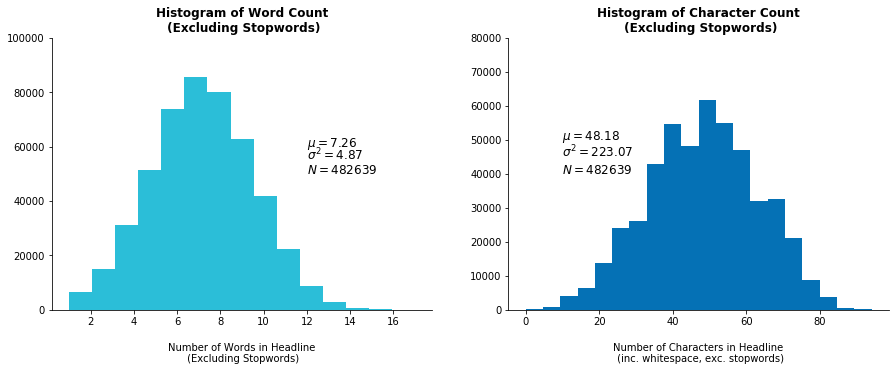

In [22]:
# Plot Histograms of wordcount and character count
# Excluding stopwords

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))

# Plot Wordcount
ax1.set_title(
    "Histogram of Word Count\n (Excluding Stopwords)",
    fontsize=12,
    fontweight=600,
)
ax1.set_ylim(0,100000)
ax1.set_xlabel("\nNumber of Words in Headline\n (Excluding Stopwords)")
ax1.hist(
    df['Wordcount_no_stopwords'].values,
    color="#2bbed8",
    bins=15
)
ax1_mu = round(df['Wordcount_no_stopwords'].mean(), 2)
ax1_var = round(df['Wordcount_no_stopwords'].var(), 2)
ax1_N = df['Wordcount_no_stopwords'].shape[0]
ax1.text(12, 60000, f'$\mu={ax1_mu}$', fontsize=12) # Mean
ax1.text(12, 55000, f'$\sigma^2={ax1_var}$', fontsize=12) # Variance
ax1.text(12, 50000, f'$N={ax1_N}$', fontsize=12) # Sample Size
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

# Plot Character Count
ax2.set_title(
    "Histogram of Character Count\n (Excluding Stopwords)",
    fontsize=12,
    fontweight=600,
)
ax2.set_ylim(0,80000)
ax2.set_xlabel("\nNumber of Characters in Headline\n (inc. whitespace, exc. stopwords)")
ax2.hist(
    df['Charcount_no_stopwords'].values,
    color='#0571b5',
    bins=20
)
ax2_mu = round(df['Charcount_no_stopwords'].mean(), 2)
ax2_var = round(df['Charcount_no_stopwords'].var(), 2)
ax2_N = df['Charcount'].shape[0]
ax2.text(10, 50000, f'$\mu={ax2_mu}$', fontsize=12) # Mean
ax2.text(10, 45000, f'$\sigma^2={ax2_var}$', fontsize=12) # Variance
ax2.text(10, 40000, f'$N={ax2_N}$', fontsize=12) # Sample Size

ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

fig.show()
plt.savefig('../static/img/histograms_no_stopwords.png',dpi=300,bbox_inches="tight")

## Generating Word Clouds 

In [23]:
def generate_word_cloud(df, category=''):
    
    ''' Generate word cloud per category.
    Returns tuple of Wordcloud Object and dataframe of value counts of words
    in category.
    Shows plots and saves plots to /static/img folder
    '''
        
    word_list = []
    df_headlines = df['Headline_no_stopwords']
    if category:
        df_headlines = df_headlines.loc[df['Category']==category]
        
    df_headlines \
        .apply(lambda x: word_list \
        .extend(x.lower() \
        .split(' ')))
    
    df_category_words = pd.DataFrame({"word_list":word_list})['word_list']
    text = " ".join(df_category_words.values)
    
    wordcloud = WordCloud(
        max_font_size=60, 
        max_words=120, 
        collocations=False, 
        background_color="white",
        width=500,
        height=530,
        font_path="../static/fonts/NotoSerif-Regular.ttf",
        colormap='cividis'
    ).generate(text)
    
    df_category_counts = df_category_words.value_counts()
    # Plot wordcloud and wordcount ranking
    # Plot Histograms of wordcount and character count
    
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,8))

    if category:
        title_text = f' Wordcloud for Category: {category}\n'
    else:
        title_text = 'Overall Wordcloud\n'    

    ax1.set_title(
        title_text,
        fontsize=12,
        fontweight=600,
        loc='left'
    )
    ax1.imshow(wordcloud, interpolation='bilinear')
    ax1.axis("off")
    ax1.set(frame_on=False)
    
    if category:
        title_text = f'Top 25 Words for Category: {category}'
    else:
        title_text = 'Overall Top 25 Words'
        
    ax2.set_title(
        title_text,
        fontsize=12,
        fontweight=600,
        loc='left'
    )
    ax2.barh(
        np.arange(25), 
        df_category_counts[:25].values[::-1],
    )
    ax2.set_yticks(np.arange(25))
    ax2.set_yticklabels(df_category_counts[:25].index[::-1], fontsize=12)
    ax2.set(frame_on=False)
    fig.show()
    
    plt.savefig(f"../static/img/word_cloud_{category.replace('/','-')}.png",
                dpi=300,
                bbox_inches="tight"
    )    
    return (wordcloud, df_category_words.value_counts())

### Generate word cloud consolidated across full dataset

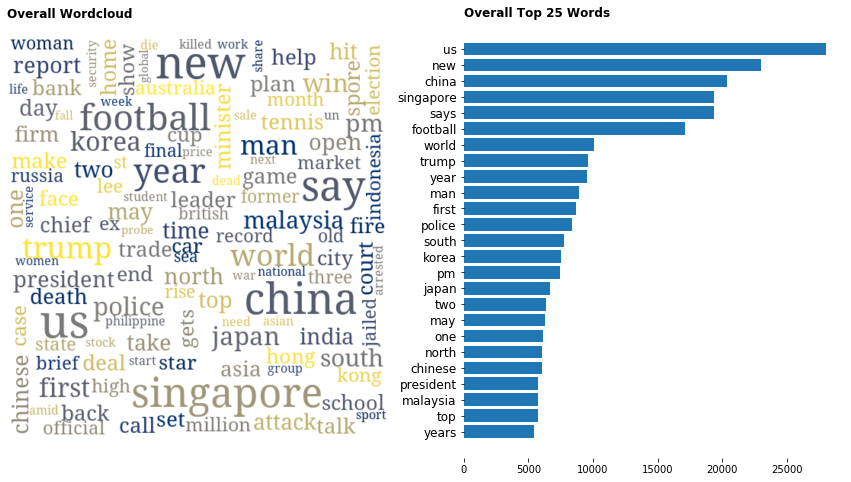

In [24]:
_,_ = generate_word_cloud(df=df, category='')

### Generate Overall word cloud for each category in top 25 categories

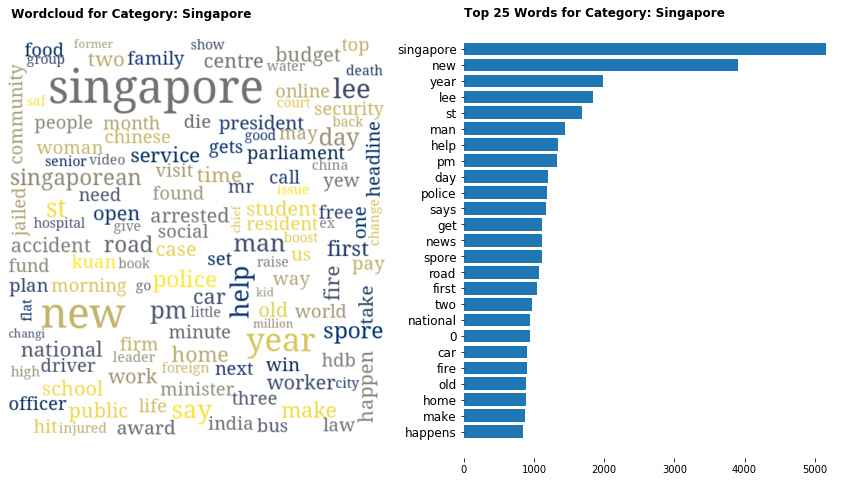

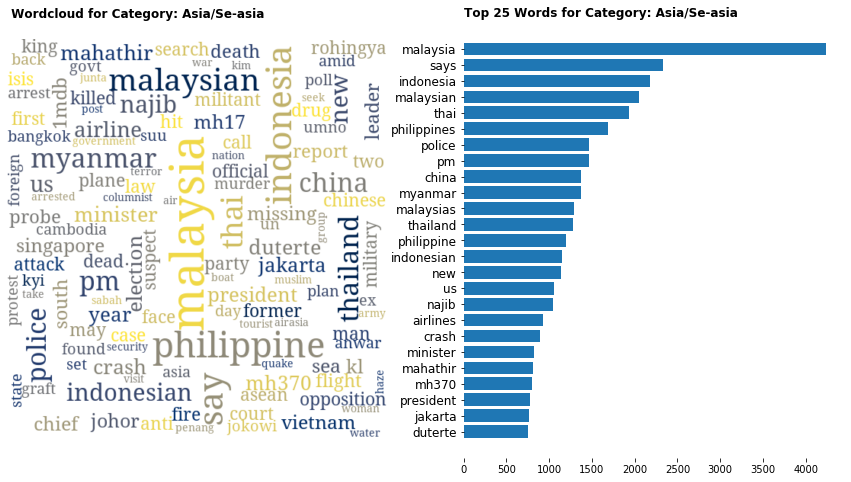

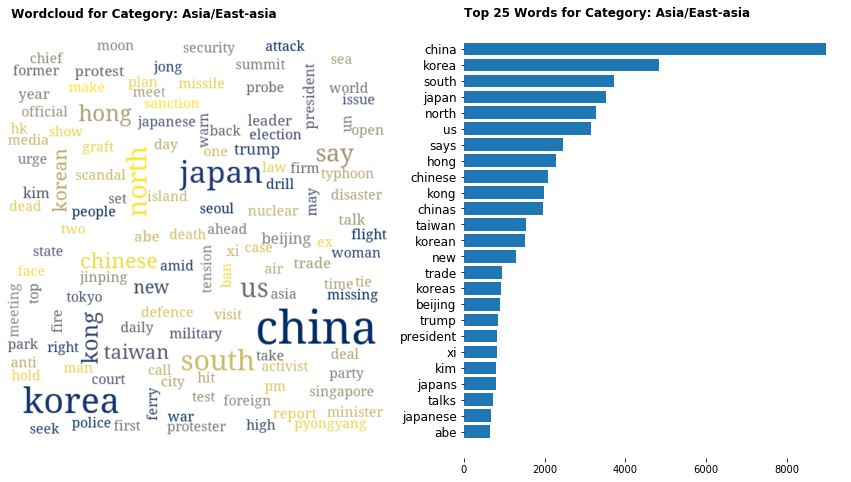

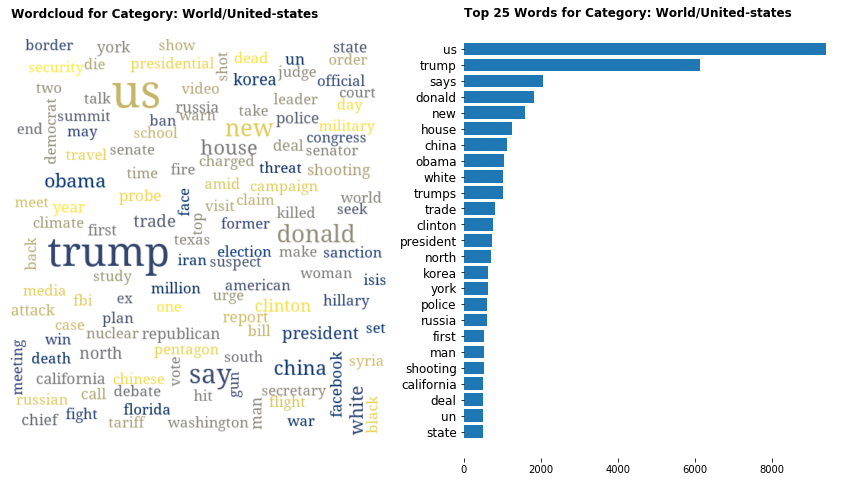

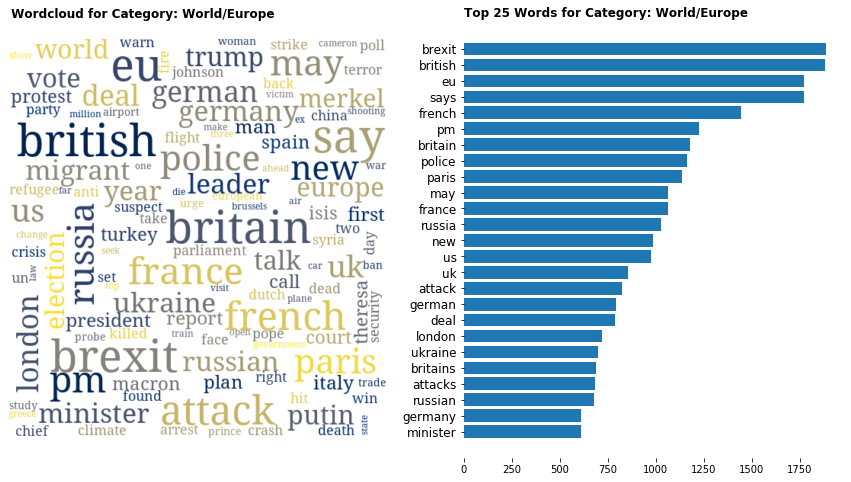

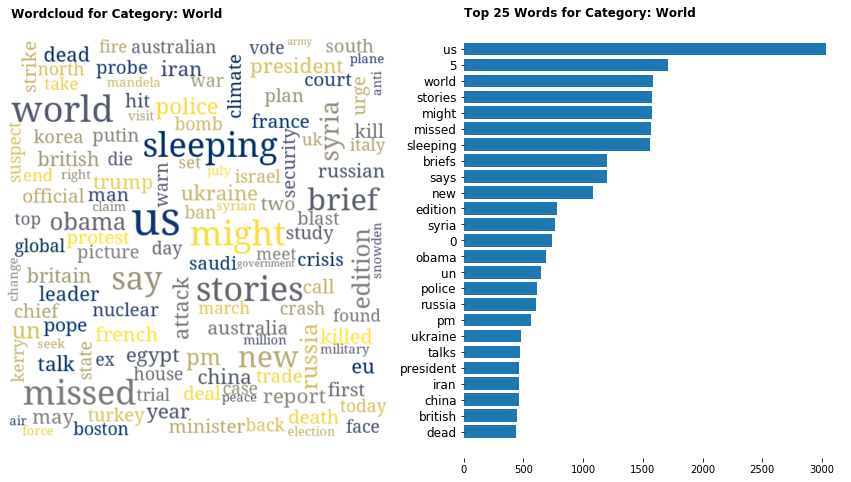

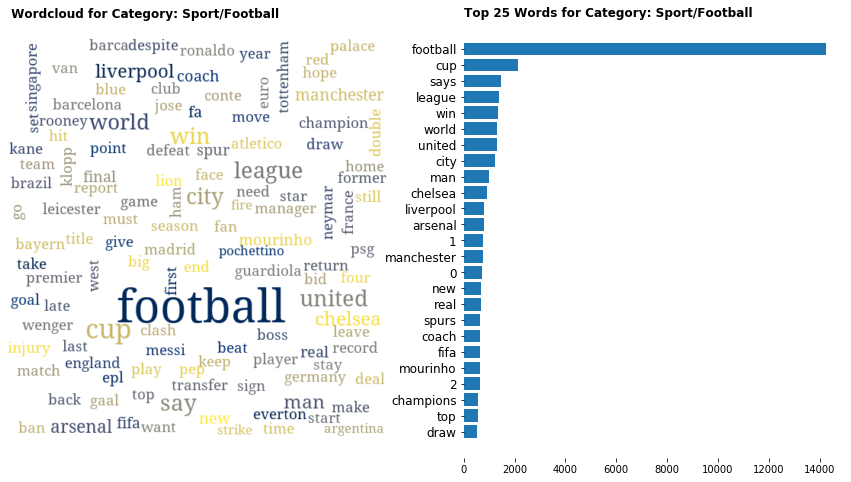

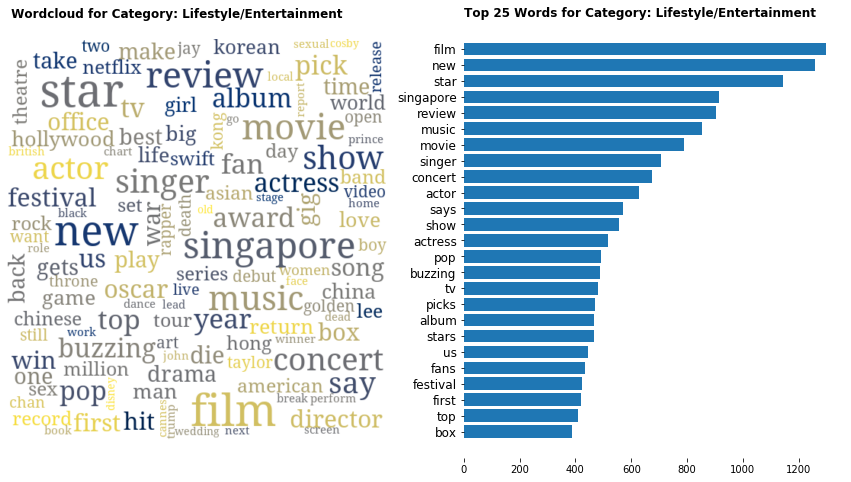

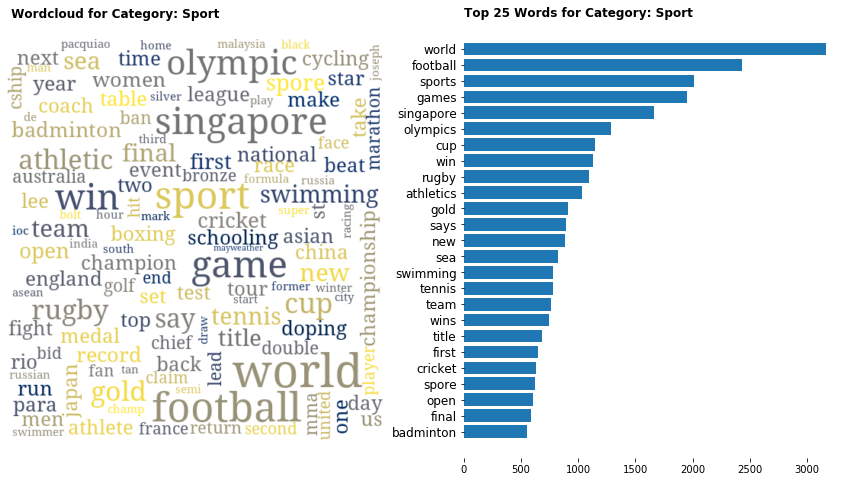

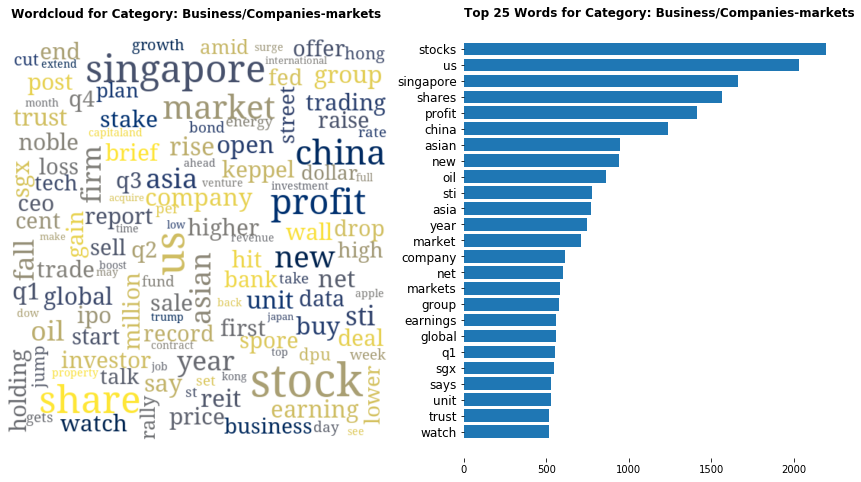

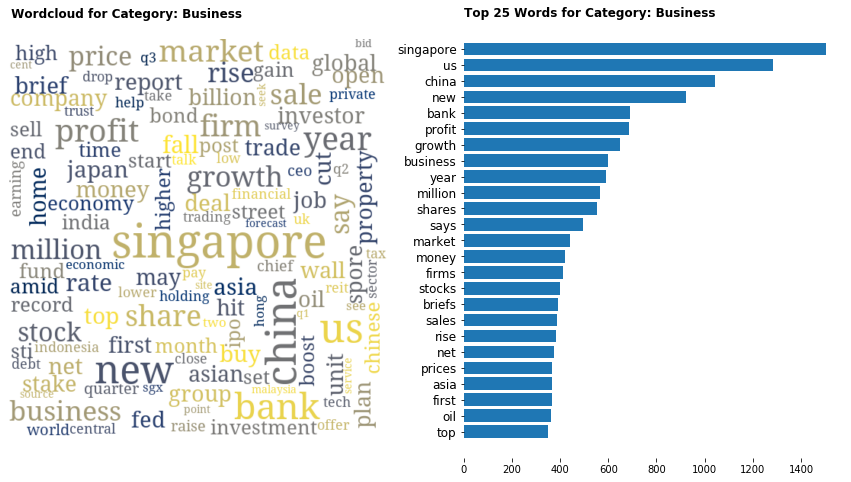

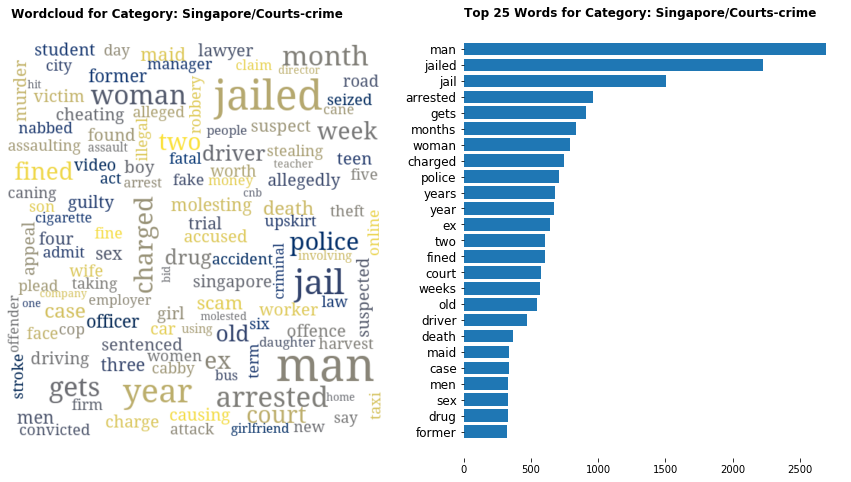

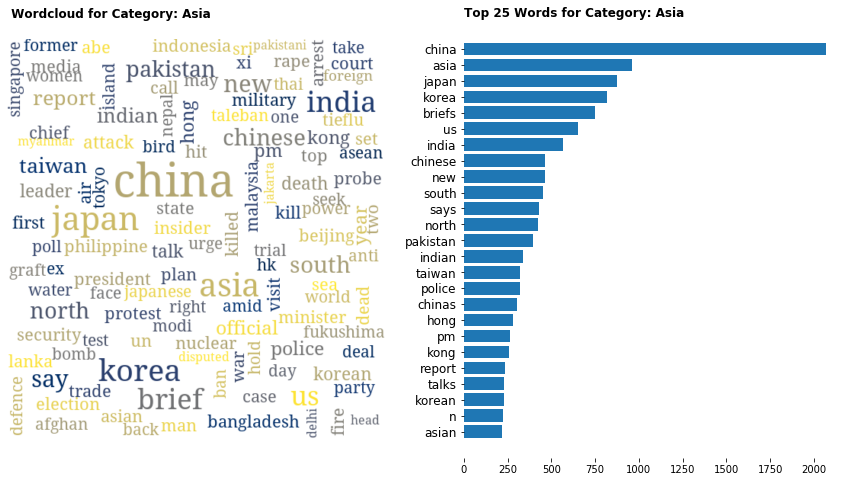

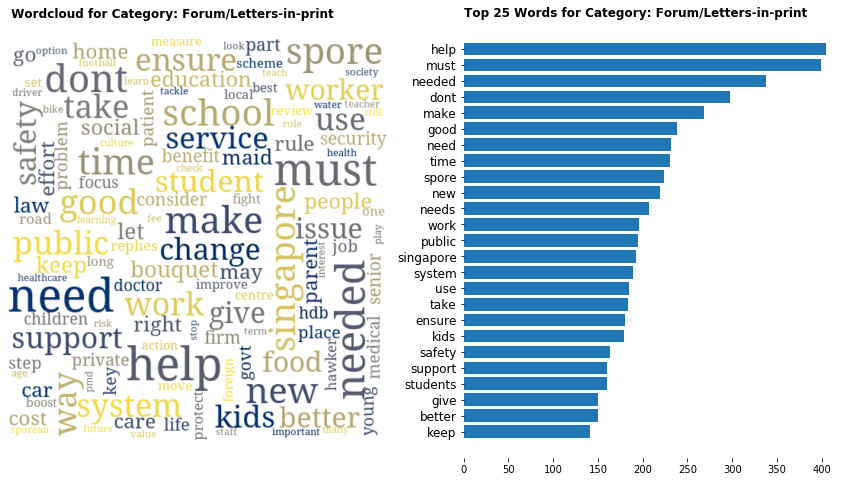

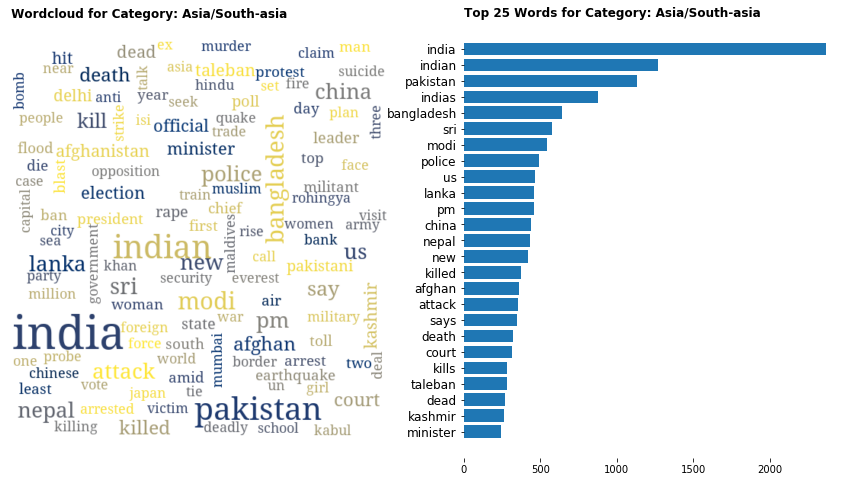

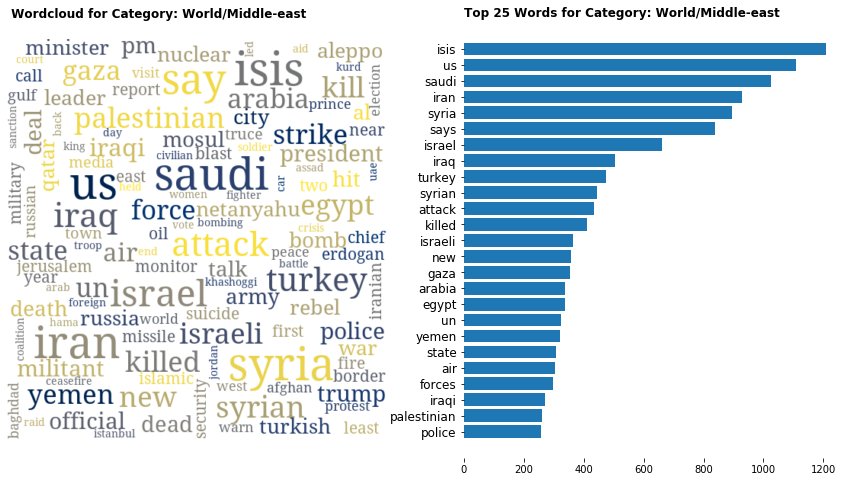

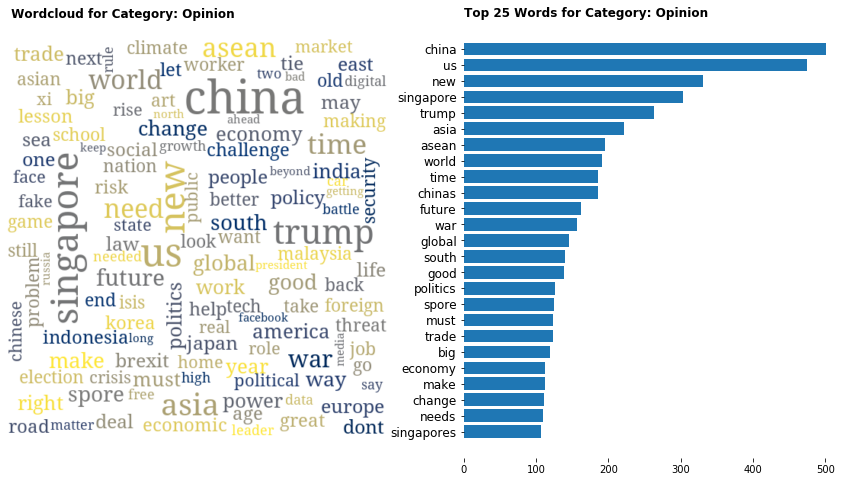

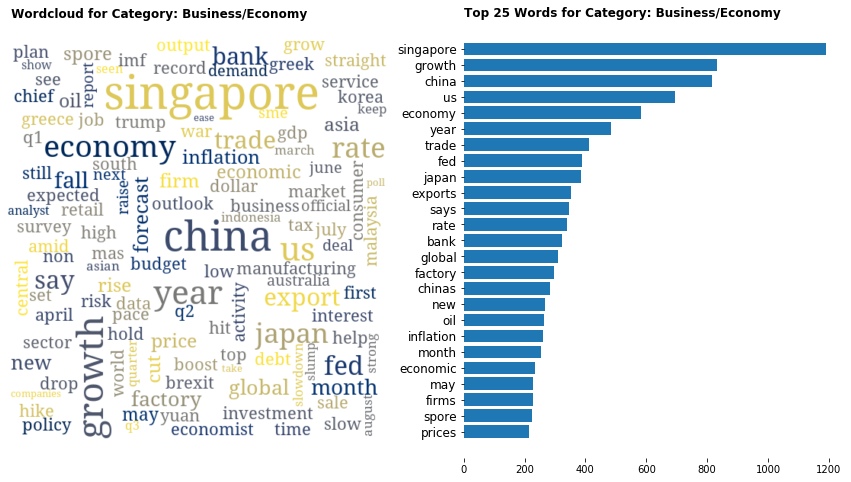

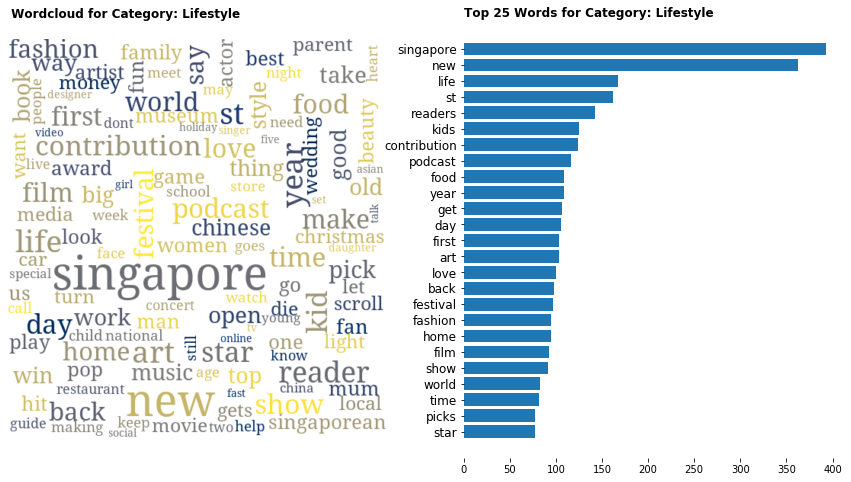

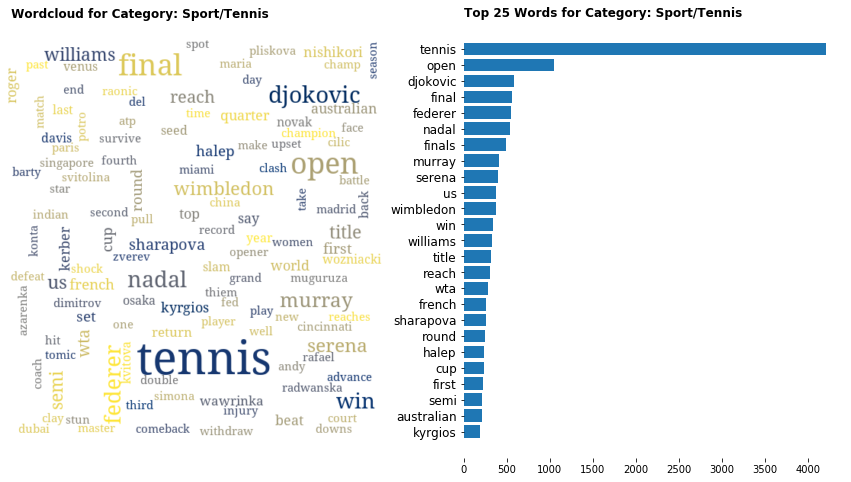

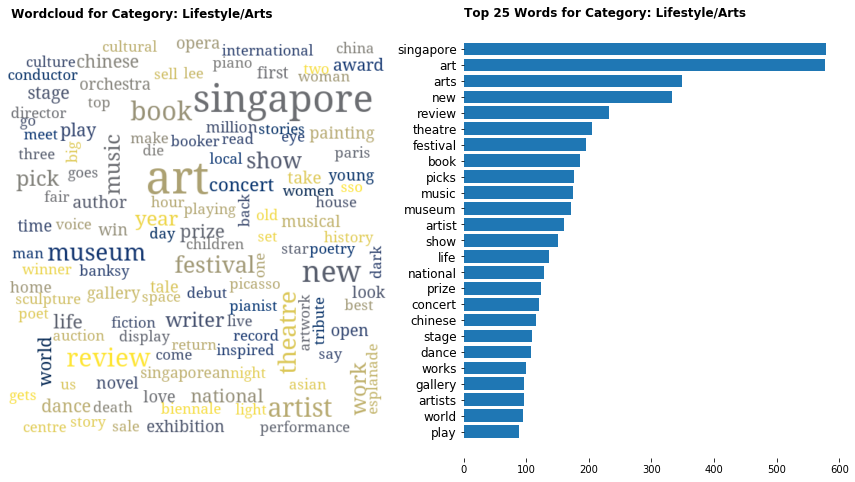

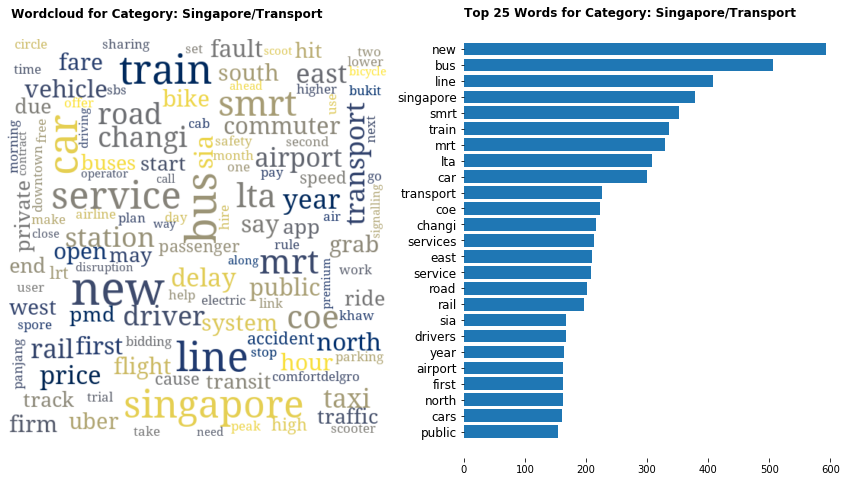

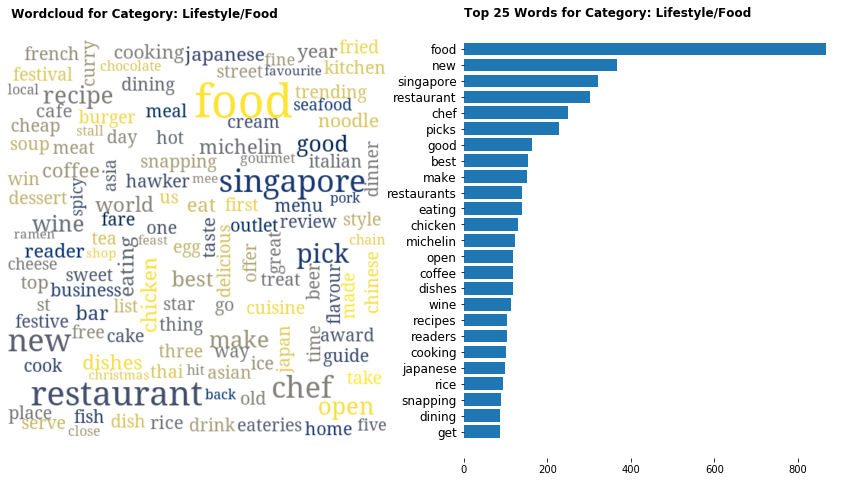

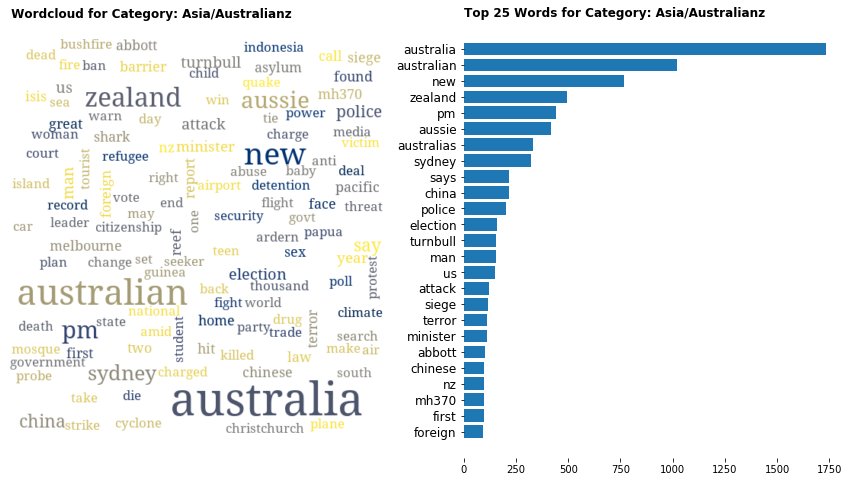

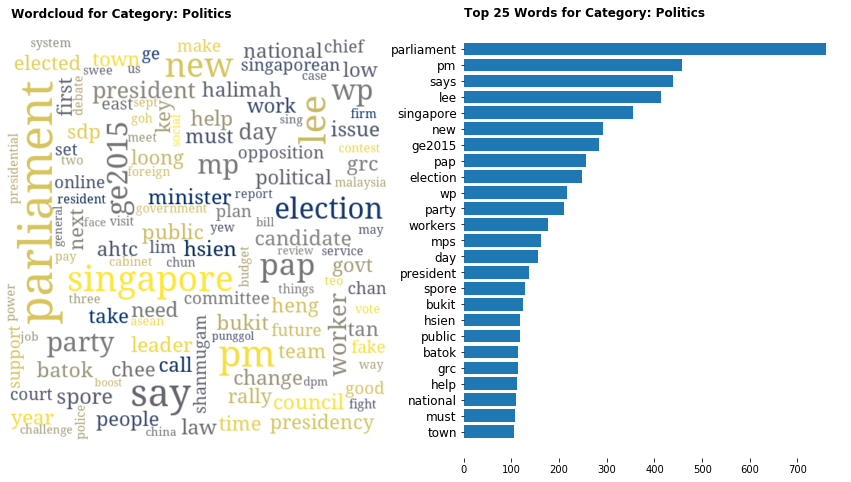

In [13]:
# Generate All word clouds for top 25 categories
for cat in df_categories[:25].index:
    _, _ = generate_word_cloud(df=df, category=cat)